In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/home/samuel/xai-health-risk-system/projectenv/lib/python3.12/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [4]:
#Load processed datasets
diabetes_processed = pd.read_csv("../data/processed/diabetes_processed.csv")
heart_disease_processed = pd.read_csv("../data/processed/heart_processed.csv")

In [8]:
diabetes_processed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
heart_disease_processed.head()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


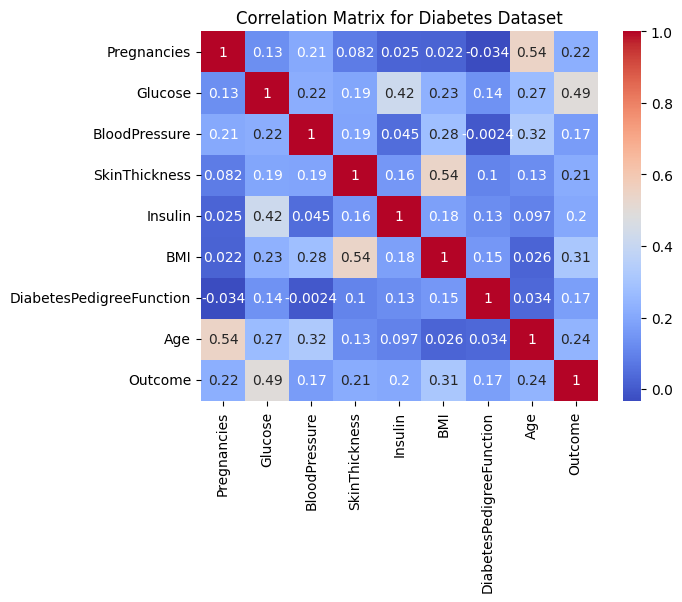

Highly correlated features:
                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                       NaN      NaN            NaN            NaN   
Glucose                           NaN      NaN            NaN            NaN   
BloodPressure                     NaN      NaN            NaN            NaN   
SkinThickness                     NaN      NaN            NaN            NaN   
Insulin                           NaN      NaN            NaN            NaN   
BMI                               NaN      NaN            NaN            NaN   
DiabetesPedigreeFunction          NaN      NaN            NaN            NaN   
Age                               NaN      NaN            NaN            NaN   
Outcome                           NaN      NaN            NaN            NaN   

                          Insulin  BMI  DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                   NaN  NaN                       NaN  NaN      NaN  
Glucose  

In [11]:
#Correlation matrix for diabetes dataset
correlation_matrix = diabetes_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Diabetes Dataset')
plt.show()

# Identify highly correlated features
threshold = 0.8
high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1.0)]
print("Highly correlated features:")
print(high_corr)

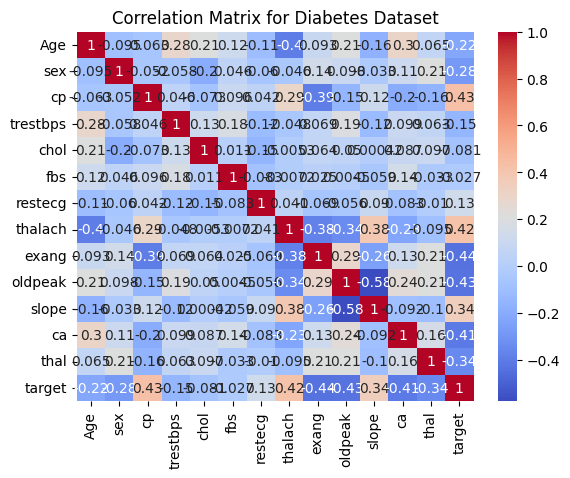

Highly correlated features:
          Age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
Age       NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
sex       NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
cp        NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
trestbps  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
chol      NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
fbs       NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
restecg   NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
thalach   NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
exang     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
oldpeak   NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
slope     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   


In [12]:
#Correlation matrix for diabetes dataset
correlation_matrix = heart_disease_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Diabetes Dataset')
plt.show()

# Identify highly correlated features
threshold = 0.8
high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1.0)]
print("Highly correlated features:")
print(high_corr)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF for diabetes dataset
vif = calculate_vif(diabetes_processed.drop(columns=['Outcome']))  # Drop target column
print(vif)

                    Feature        VIF
0               Pregnancies   3.273488
1                   Glucose  21.723850
2             BloodPressure  31.717477
3             SkinThickness  17.321002
4                   Insulin   4.528320
5                       BMI  33.678170
6  DiabetesPedigreeFunction   3.153079
7                       Age  14.357379


In [16]:
# Calculate VIF for diabetes dataset
vif = calculate_vif(heart_disease_processed.drop(columns=['target']))  # Drop target column
print(vif)

     Feature        VIF
0        Age  39.567644
1        sex   3.507112
2         cp   2.409980
3   trestbps  58.776923
4       chol  26.281421
5        fbs   1.273256
6    restecg   2.051037
7    thalach  42.631809
8      exang   2.022825
9    oldpeak   3.071361
10     slope  10.015857
11        ca   1.860512
12      thal  17.141073


In [5]:
heart_disease_processed.corr()

,Age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [6]:
diabetes_processed.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000
